## Neuroimaging Basics in Python

This notebook will demonstrate some simple neuroimaging tools in python.

`Libraries` are third party, open source packages that can be installed and imported into your python environment.

This is what makes python so powerful. Anyone can write a library and share it with the world.

To use a library, you'll need to install it first. You can do this using the `!pip install` command.

Then you need to import the library name at the top of your code.

### Some NumPy basics:

In [58]:
import numpy as np

vector = np.array([1, 2, 3, 4, 5])
# display(vector)

# # Let's add 1 to each element of the vector
# vector_plus_one = vector + 1
# display(vector_plus_one)

# another_vector = np.array([6, 7, 8, 9, 10, 11])
# 
# another_vector_plus_vector = another_vector + vector

### Let's start working with 2d arrays (matrices) in python.

In [64]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# display(matrix)


# # Let's add 1 to each element of the matrix
# matrix_plus_one = matrix + 1
# display(matrix_plus_one)

# print("What is the value in the first row, third column? We can index the matrix to find out.")

# print(matrix[0, 2])

# print("How can we see the number of rows/columns in a numpy array?")
# print("We can use the shape attribute of the numpy array.")
print(matrix.shape)

(3, 3)


### How about more dimensions?

In [71]:
three_d_array = np.random.rand(3, 3, 3)
# display(three_d_array)
# print(three_d_array.shape) # 3 rows, 3 columns, 3 depth. 

four_d_array = np.random.rand(3, 3, 3, 3)
# display(four_d_array)

# print("You can index values in a 4d array the same way a 2d or 3d array is indexed, although its harder to visualize what's happening.")
print(four_d_array[0, 0, 0, 0])

0.2855387801317357


### Now let's try NiBabel
Brain maps can be represented in memory with numpy arrays.

Most brain maps are 3d, with X/Y/Z coordinates. X=width, Y=height, Z=depth.
This corresponds to the 3 dimensions of the numpy array.

In [3]:
import nibabel as nib

path = 'example_data/amnesia_sensitivity_map.nii.gz'
img = nib.load(path)
# display(img) # This is the image object

# print(img.shape)
# print("If shape is 3 values, then its a 3d image.")

# img_data = img.get_fdata()
# img_data[52,50,32]

#### How about a 4d brain map?

4d brain maps are used to represent time series data, usually fMRI. 

It can also be used to represent multiple subjects' maps in a concatenated form.

The last dimension (4th) can be thought of as the time dimension for time series data.

In [76]:
path = "/Users/jt041/repos/brain_mapping_intro/example_data/example_fmri.nii.gz"
img = nib.load(path)
print(img.shape)

(91, 109, 91, 120)


### Accessing, slicing, and indexing brain maps

In [4]:
path = 'example_data/amnesia_sensitivity_map.nii.gz'
img = nib.load(path)
img_data = img.get_fdata()
# display(img_data)
img_data[0, 0, 0] # This is just a zero, because its a corner of the rectangular prism enclosing the brain.
# A lot of this prism is just empty space.

# Let's look more towards the center of the brain
# img_data[45, 50, 45]

0.0

### What if you wanted to look at slices of the brain?

<Axes: >

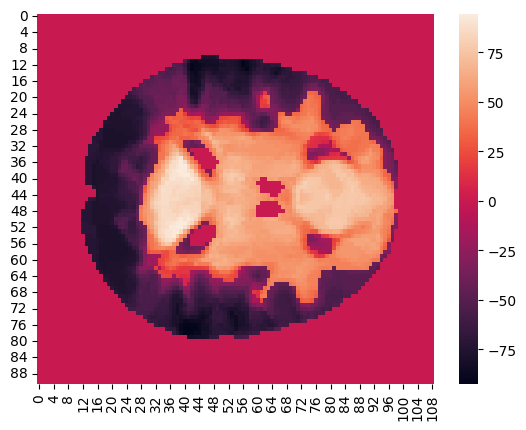

In [5]:
import seaborn as sns
img_data[:, :, 45]

sns.heatmap(img_data[:, :, 45])

# img_data[:, :, 45].shape

# print(np.count_nonzero(img_data[:, :, 45])) # This is the number of non-zero values in the image.

## Changing brain maps

You will rarely arbitrarily change a brain map-- We derive them from statistical procedures.

But its useful to understand how you would do it!


**Multiplying**

In [6]:
path = 'example_data/amnesia_sensitivity_map.nii.gz'

img = nib.load(path)
img_data = img.get_fdata()

img_data_times_two = img_data * 2

img_new = nib.Nifti1Image(img_data_times_two, img.affine)
img_new.to_filename('example_data/amnesia_sensitivity_map_times_two.nii.gz')

**Thresholding**

This example uses some more advanced numpy indexing techniques.

`Logical indexing` is a powerful tool in numpy that allows you to select elements based on a condition.
- Using operators like `>`, `~`,  let us select elements that meet a condition or don't meet a condition.

Also, numpy arrays are mutable-- we can change values at specific locations in the array. 

In [23]:
import numpy as np

path = 'example_data/amnesia_sensitivity_map.nii.gz'

img = nib.load(path)
img_data = img.get_fdata()


# Masking and binarizing in three lines
img_data_logical_mask = img_data > 50
img_data[~img_data_logical_mask] = 0
img_data[img_data_logical_mask] = 1

# Masking and binarizing in one line. 
img_data = np.where(img_data > 50, 1, 0)
# This is kind of an if-else statement, where you state the condition, 
# then the value if true, 
# then the value if false.


img_new = nib.Nifti1Image(img_data, img.affine)
img_new.to_filename('example_data/amnesia_sensitivity_map_thresholded_50.nii.gz')